In [1]:
import pandas as pd

In [14]:
def parse_log(logname):
    acc_dict = {}
    acc_dict['test_acc'] = []
    acc_dict['test_adv_acc'] = []
    acc_dict['epoch'] = []

    epoch = 1
    test_acc_key = "test acc: "
    with open(logname) as f:
        for line in f:
            if line.startswith(test_acc_key):
                acc_dict['epoch'].append(int(epoch))
                acc_dict['test_acc'].append(float(line.split(' ')[2]))
                acc_dict['test_adv_acc'].append(float(line.split(' ')[7]))
                epoch += 1

    acc_df = pd.DataFrame(acc_dict, index=pd.Index(acc_dict['epoch']))
    acc_df.drop(columns=['epoch'], inplace=True)
    return acc_df

In [15]:
triplet2_df = parse_log("adv_output-663176.txt")
triplet2_df.columns = ['triplet2_test_acc', 'triplet2_test_adv_acc']
triplet1_df = parse_log("adv_output-663178.txt")
triplet1_df.columns = ['triplet1_test_acc', 'triplet1_test_adv_acc']
nt_df = parse_log("adv_output-663177.txt")

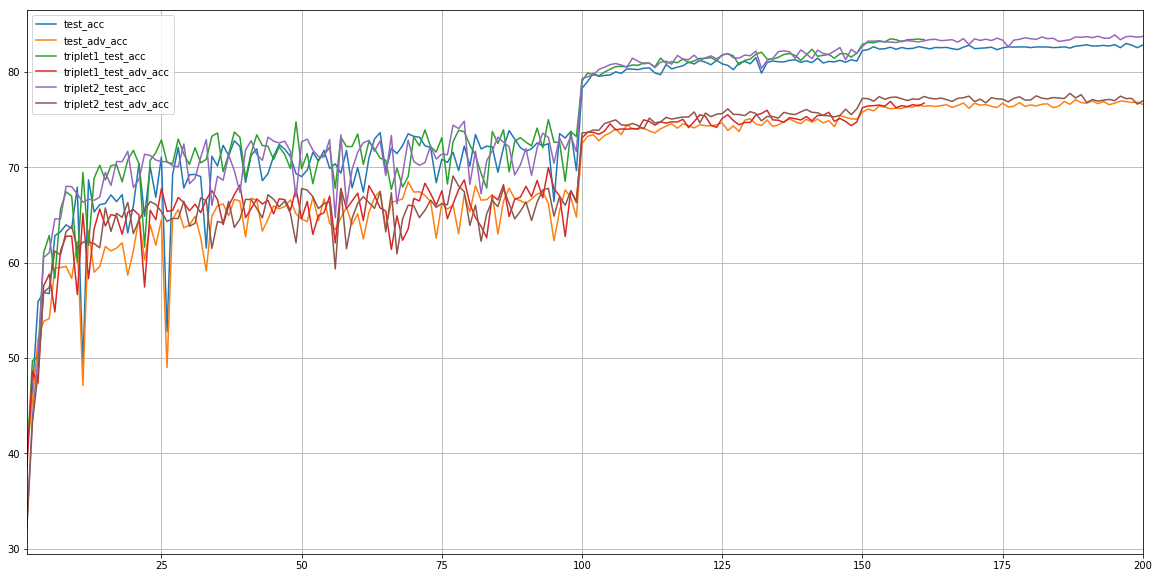

In [16]:
ax = nt_df.plot(grid=True, figsize=(20, 10))
triplet1_df.plot(grid=True, ax=ax)
triplet2_df.plot(grid=True, ax=ax)